# Global Entities - per Entity Group - Visualizer 

#### Version 1.0

### TODO

- ~~Line plot for world~~
- Line plot of aggregated countries and compare to world
- ~~Line plot per country/region/income/etc~~
- ~~Heatmap for corellation between metrics per entity~~
- Correlation between metrics across entities

### Observations

## Setup

### Import Packages

In [4]:
from datetime import datetime, date
from pprint import pprint
from collections import OrderedDict
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set ipython's max row display
# pd.set_option('display.max_row', 1000)
# Set iPython's max column width
pd.set_option('display.max_columns', 50)

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 10]

### Functions

In [5]:
def masked_heatmap():
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig,ax = plt.subplots()
    sns.heatmap(corr,center = 0, fmt = ".3f", square = True, annot= True, mask=mask)

## Global Variables

#### Dataset Parameters

In [6]:
file_name = '../data/silver_tables/yearly_values_per_entity.csv'

year_range = [1960, 2022]
metric_agg = 'last_year'
metric_agg = 'growth_rate'
metric_agg = '?'

In [7]:
# Countries to use for country level analysis
country_list = ['United Arab Emirates', 'Kuwait', 'Oman', 'Saudi Arabia', 'Bahrain', 'Qatar'] 

In [8]:
key_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)', 'Fossil fuels (% equivalent primary energy)',
    'Renewables per capita (kWh - equivalent)', 'Renewables (% electricity)',
    'Solar Generation - TWh', 'prod of Electricity from solar (TWh)',
]

corr_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)',
    'Renewables per capita (kWh - equivalent)',
]

## Data Prep

In [9]:
df_original = pd.read_csv(file_name)

In [10]:
df_original = df_original.loc[
    (df_original['Year'] > year_range[0])
    & (df_original['Year'] < year_range[1])
]

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17013 entries, 12 to 27959
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity_Category                                     17013 non-null  object 
 1   Entity                                              17013 non-null  object 
 2   Year                                                17013 non-null  int64  
 3   Annual CO2 emissions                                13723 non-null  float64
 4   Fossil fuels (% growth)                             6034 non-null   float64
 5   Annual change in primary energy consumption (%)     12261 non-null  float64
 6   Unnamed: 0                                          13164 non-null  float64
 7   Unnamed: 0.1                                        13164 non-null  float64
 8   Unnamed: 0.1.1                                      13164 non-null  float64

In [12]:
df_original.head()

,Entity_Category,Entity,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
12,Country,Afghanistan,1961,490798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Country,Afghanistan,1962,688594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Country,Afghanistan,1963,706736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Country,Afghanistan,1964,838551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Country,Afghanistan,1965,1006917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_original.describe()

,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
count,17013.000000,1.372300e+04,6034.000000,12261.000000,13164.000000,13164.000000,13164.000000,6094.000000,6134.000000,6160.000000,6068.000000,2500.000000,4408.000000,4053.000000,4840.000000,6068.000000,57.000000,57.000000,57.000000,5948.000000,5924.000000,5939.000000,6153.000000,8953.000000,9170.000000,8939.000000,8899.000000,6220.000000,4862.000000,7008.000000
mean,1992.379533,4.750953e+08,3.317557,4.125264,6581.873215,6581.873215,6581.873215,1228.198540,1625.004354,2228.388291,5136.950645,3274.685893,3466.583599,1775.709862,31653.758962,85.831892,21492.190695,39160.740543,28584.640556,12.445990,5.047541,13.805802,136.736280,12.191714,105.856874,4.423860,10.535739,3950.509462,4.339072,30.488270
std,17.069374,2.184178e+09,22.875763,27.879834,3800.896830,3800.896830,3800.896830,3413.741868,4907.816698,5840.259523,13737.030117,6908.166717,6955.447481,4042.829666,33092.712344,14.603942,9564.826179,8988.199100,10007.255369,45.803265,38.265463,81.229086,374.128795,81.726038,346.000705,37.610140,45.642700,5026.958829,12.693478,30.934145
min,1961.000000,3.664000e+03,-49.590828,-95.005081,0.000000,0.000000,0.000000,0.000000,0.000000,0.097381,0.097381,0.339596,0.000000,0.000000,155.807388,12.804697,6303.798828,17989.603516,16060.809570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,6.998240e+05,-0.531910,-0.349981,3290.750000,3290.750000,3290.750000,12.293094,4.537538,80.953899,149.484257,38.597149,100.963156,44.498001,10325.921631,80.509890,14118.032227,33680.054688,20363.539062,0.000000,0.000000,0.000000,1.389000,0.000000,0.100000,0.000000,0.000000,596.250275,0.208465,3.552361
50%,1993.000000,7.081458e+06,2.589911,2.460420,6581.500000,6581.500000,6581.500000,81.496605,46.895945,208.418251,418.682419,357.479385,467.141678,192.537277,25337.834961,90.139271,20265.484375,38151.847656,25963.681641,0.201000,0.000000,0.000000,10.712626,0.000000,3.565500,0.000000,0.020000,2502.079101,0.899160,18.145459
75%,2007.000000,6.293776e+07,5.987856,6.231642,9872.250000,9872.250000,9872.250000,429.343689,442.860115,999.276443,1808.173248,2806.387512,3527.187439,992.275024,40323.159180,96.528872,29315.390625,47172.609375,40175.359375,3.617000,0.016565,0.221320,59.555000,0.040000,28.667310,0.010000,1.333982,5627.821900,3.228757,53.127329
max,2021.000000,3.670250e+10,1553.104980,1553.104980,13180.000000,13180.000000,13180.000000,40374.605469,45161.207031,53368.628906,136131.468750,46550.605469,52181.949219,40368.828125,308704.218750,100.000015,40374.605469,53368.628906,45161.207031,762.782654,1032.501221,1861.939819,4345.990234,1861.939819,4345.990234,1032.501221,762.782654,56781.601560,153.883406,100.000000


## Visualizations

### Specific Countries

In [14]:
df_original['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (Excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius And Saba',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote D'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [15]:
category_filter = "Country"

df = df_original.copy().loc[
    (df_original['Entity_Category'] == category_filter)
    & (df_original['Entity'].isin(country_list))
]

In [16]:
df.head()

,Entity_Category,Entity,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
1987,Country,Bahrain,1961,1769712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,Country,Bahrain,1962,1590176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,Country,Bahrain,1963,1194464.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,Country,Bahrain,1964,1597504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,Country,Bahrain,1965,1227440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
count,363.000000,3.570000e+02,280.000000,319.000000,337.000000,337.000000,337.000000,285.000000,285.000000,285.000000,285.000000,0.0,283.000000,312.000000,285.000000,285.000000,0.0,0.0,0.0,285.000000,285.000000,285.000000,280.0,306.000000,302.0,306.000000,306.000000,206.000000,280.000000,206.000000
mean,1991.239669,7.715938e+07,17.339240,15.837121,4864.169139,4864.169139,4864.169139,202.566560,1.035746,256.660284,460.262579,NaN,1606.396873,261.905733,102176.839665,99.973030,NaN,NaN,NaN,0.004603,0.067564,0.000889,0.0,0.000828,0.0,0.063156,0.004287,11680.955910,0.018280,0.090029
std,17.504076,1.231248e+08,100.762882,94.506021,2145.556984,2145.556984,2145.556984,256.017750,3.993504,418.827980,656.303611,NaN,1758.624985,373.262027,67338.861928,0.211084,NaN,NaN,NaN,0.022155,0.474184,0.008784,0.0,0.008479,0.0,0.457859,0.021411,5296.422040,0.101911,0.410585
min,1961.000000,1.099200e+04,-49.590828,-49.590828,2570.000000,2570.000000,2570.000000,0.000000,0.000000,0.097381,0.097381,NaN,32.830685,0.000000,155.807388,96.823532,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2134.045898,0.000000,0.000000
25%,1976.000000,1.147053e+07,0.767627,0.738877,3597.000000,3597.000000,3597.000000,25.745001,0.000000,21.226734,70.410233,NaN,436.627151,39.631625,51423.785156,99.999992,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,7655.350342,0.000000,0.000000
50%,1991.000000,3.130155e+07,5.354506,5.237436,4551.000000,4551.000000,4551.000000,97.039101,0.000000,82.106209,214.305328,NaN,937.076782,107.441036,85016.843750,100.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,11135.680665,0.000000,0.000000
75%,2006.000000,8.170412e+07,13.252520,12.532169,5578.000000,5578.000000,5578.000000,264.712494,0.075654,250.456406,519.035767,NaN,1755.714722,330.691238,137622.812500,100.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,16892.935542,0.000000,0.010827
max,2021.000000,6.748782e+08,1553.104980,1553.104980,12435.000000,12435.000000,12435.000000,1172.869873,24.760269,2044.836426,3098.861816,NaN,6823.462891,1771.524658,308704.218750,100.000015,NaN,NaN,NaN,0.115159,5.144477,0.104300,0.0,0.104300,0.0,5.144477,0.115159,21041.431640,1.214238,3.694135


#### Lineplots - Yearly

In [18]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Country')

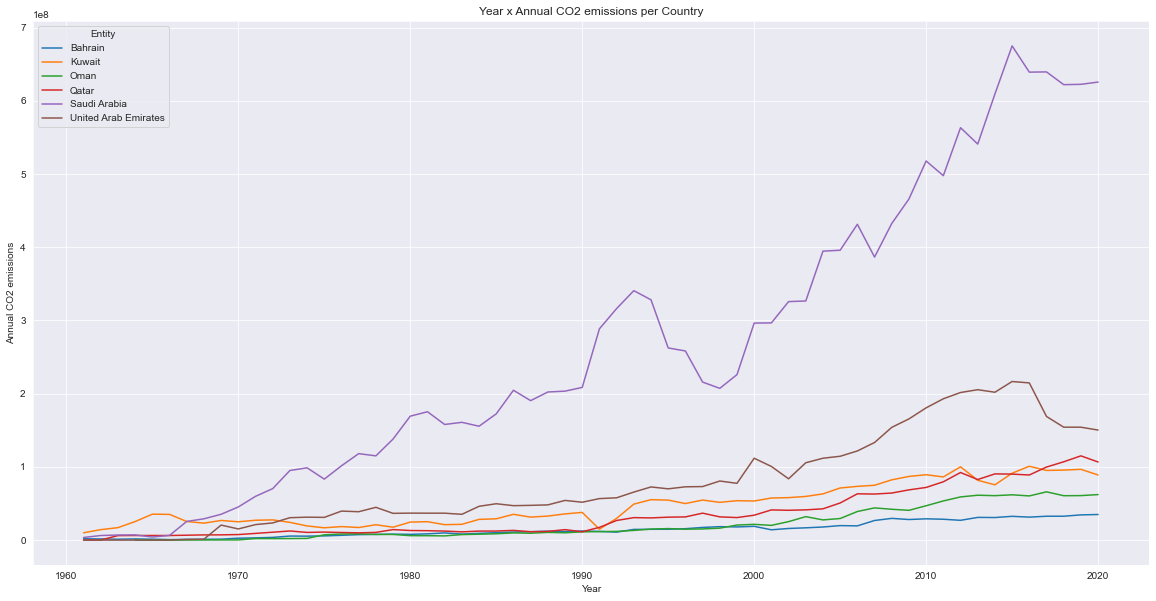

In [19]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Country")

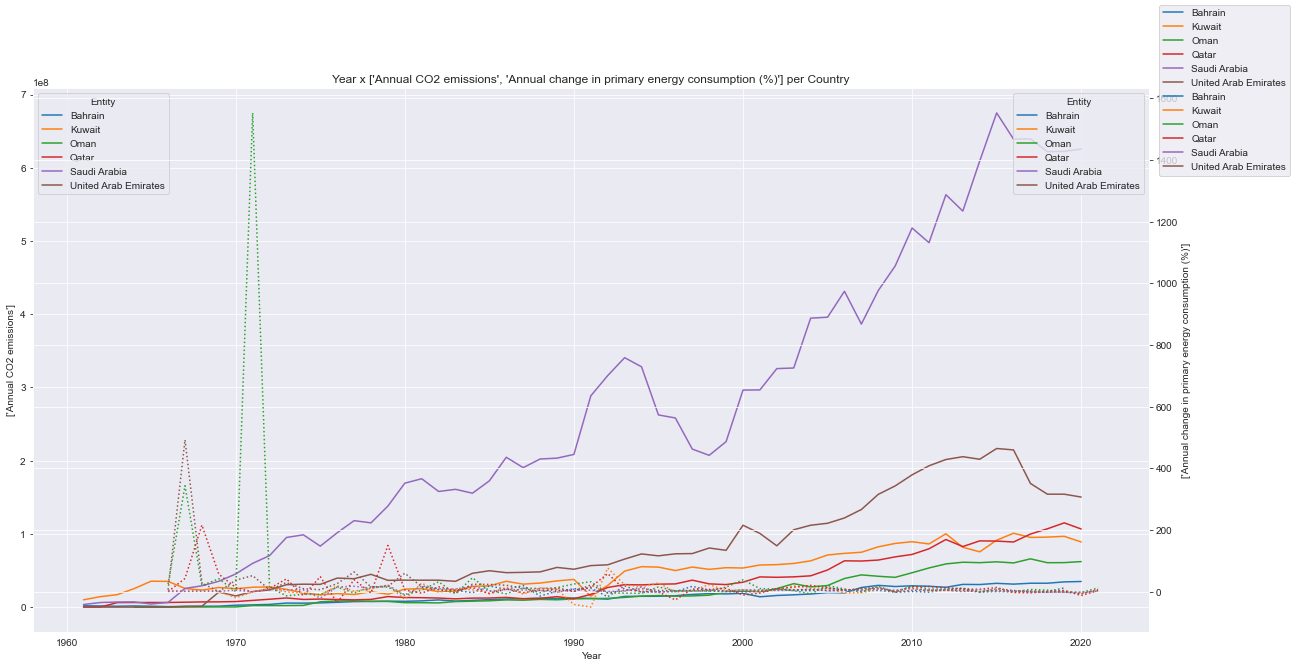

In [20]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Country")

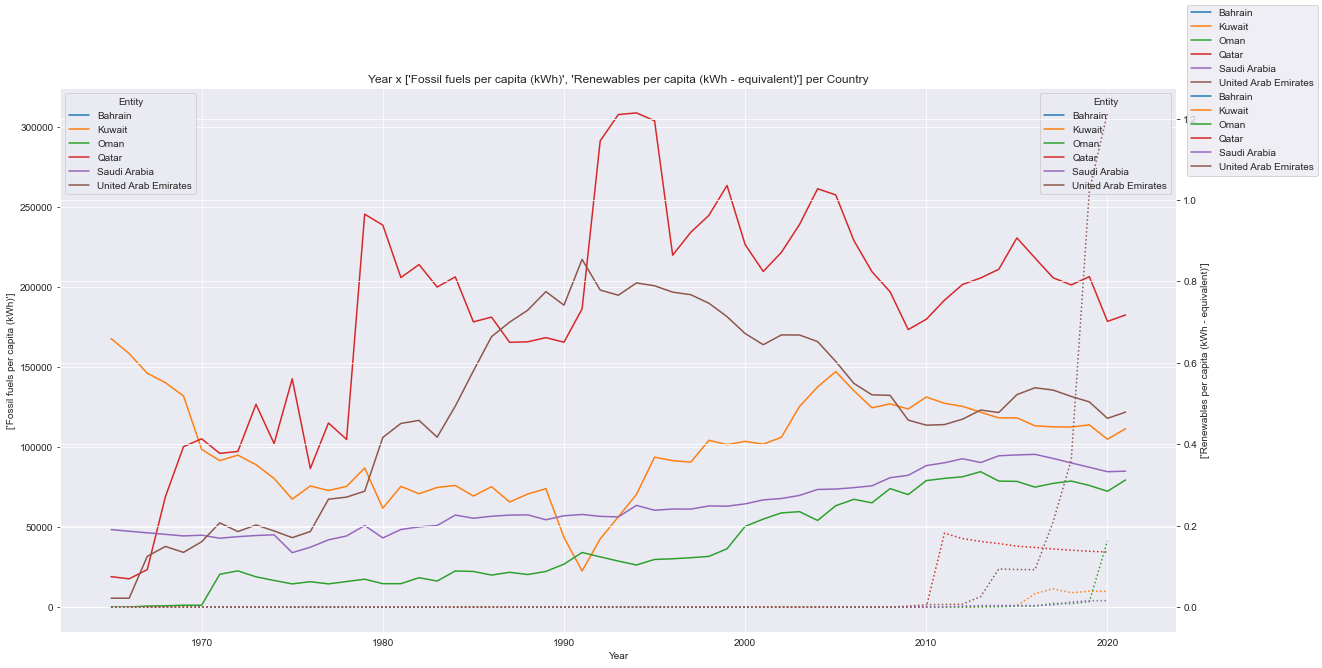

In [21]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Country")

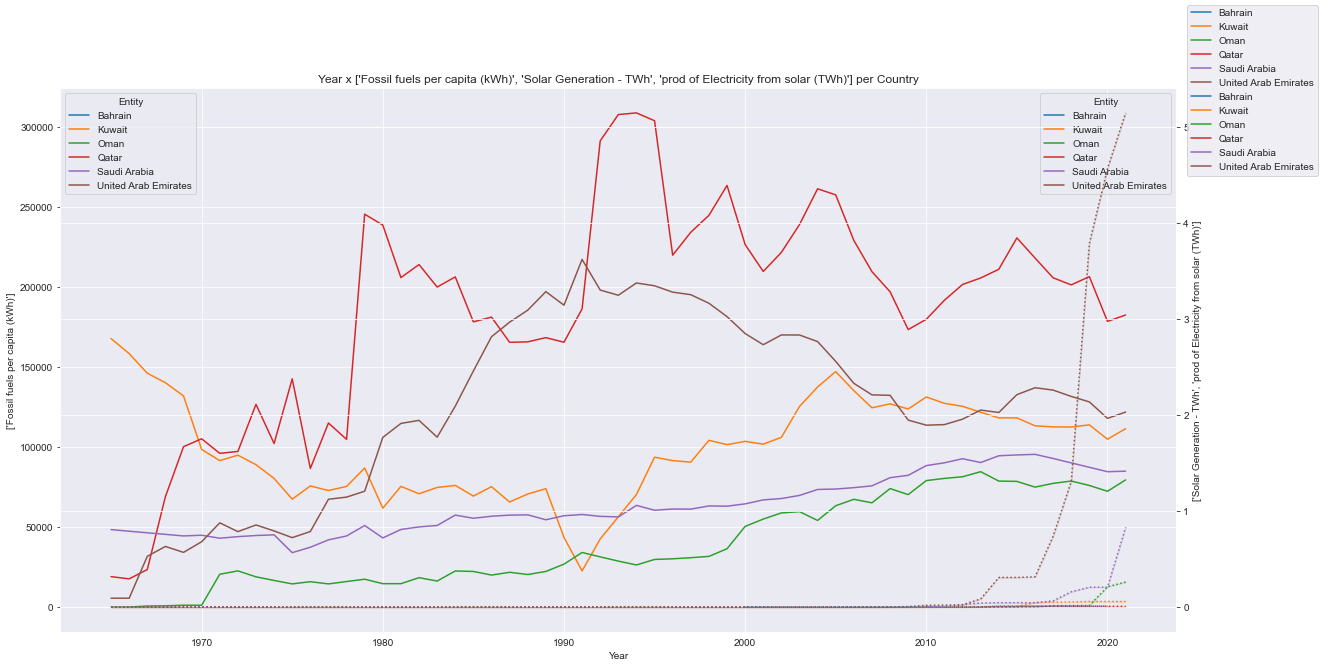

In [22]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [23]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Country]')

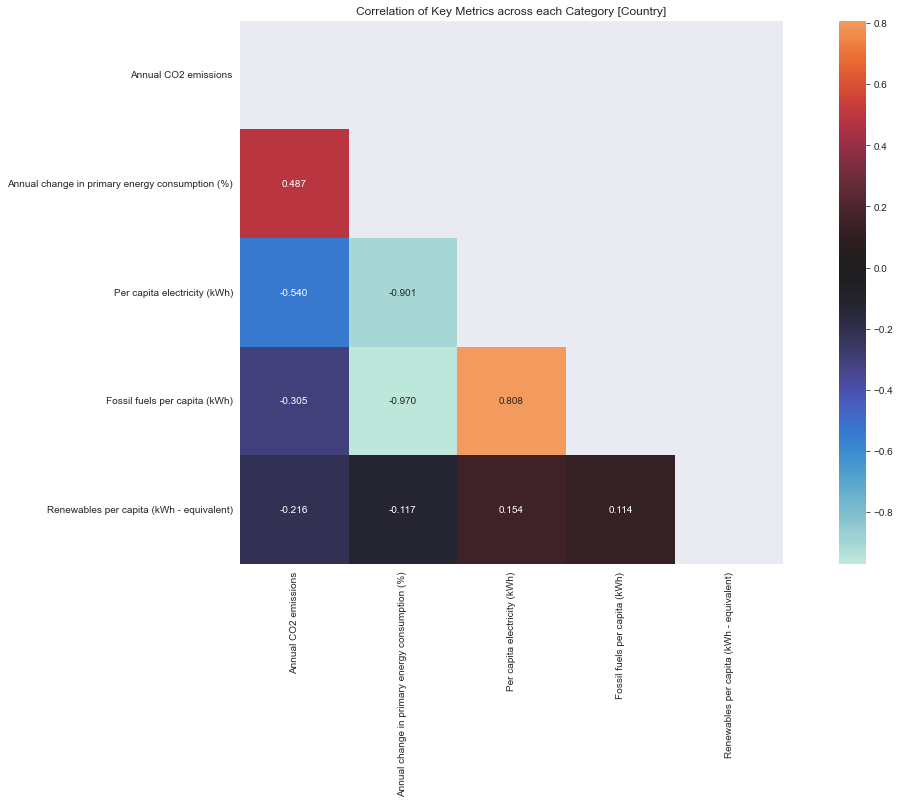

In [24]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}] in 2020")

### World

In [25]:
category_filter = "World"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [26]:
df.head()

,Entity_Category,Entity,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
24350,World,World,1961,9.417463e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24351,World,World,1962,9.750057e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24352,World,World,1963,1.027152e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24353,World,World,1964,1.082886e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24354,World,World,1965,1.131723e+10,NaN,NaN,12404.0,12404.0,12404.0,6303.798828,16140.178711,17989.603516,40433.578125,NaN,18231.082031,NaN,12107.379883,93.37812,6303.798828,17989.603516,16140.178711,17.985231,0.0,0.0,923.198059,0.0,923.198059,0.0,17.985231,NaN,0.836891,NaN


In [27]:
df.describe()

,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
count,61.000000,6.000000e+01,56.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,41.000000,57.000000,52.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,37.000000,57.000000,37.000000
mean,1991.000000,2.316182e+10,2.216326,2.443004,6117.754386,6117.754386,6117.754386,21492.190695,28584.640556,39160.740543,89237.569422,32946.541587,38535.582511,22949.439247,15760.118198,87.906087,21492.190695,39160.740543,28584.640556,208.390151,84.041714,228.345476,2431.294728,228.345476,2431.294728,84.041714,208.390151,2741.295427,1.454433,20.348038
std,17.752934,7.980183e+09,2.336746,2.130705,847.656144,847.656144,847.656144,9564.826179,10007.255369,8988.199100,28102.326104,8964.818754,8416.048570,8939.489789,1366.411639,3.220952,9564.826179,8988.199100,10007.255369,205.724881,217.619927,449.014082,985.437508,449.014082,985.437508,217.619927,205.724881,481.483171,0.482532,2.784003
min,1961.000000,9.417463e+09,-5.385285,-3.985941,5978.000000,5978.000000,5978.000000,6303.798828,16060.809570,17989.603516,40433.578125,21445.263672,18231.082031,9760.991211,12107.379883,82.211304,6303.798828,17989.603516,16060.809570,17.985231,0.000000,0.000000,923.198059,0.000000,923.198059,0.000000,17.985231,2032.845825,0.836891,17.162390
25%,1976.000000,1.775768e+10,0.696263,1.005194,5992.000000,5992.000000,5992.000000,14118.032227,20363.539062,33680.054688,69261.773438,25627.955078,33519.679688,14695.416992,15112.447266,85.727249,14118.032227,33680.054688,20363.539062,46.499256,0.000000,0.006000,1695.186157,0.006000,1695.186157,0.000000,46.499256,2283.061035,1.183239,18.754833
50%,1991.000000,2.265960e+10,2.006173,2.243525,6006.000000,6006.000000,6006.000000,20265.484375,25963.681641,38151.847656,83911.687500,27938.126953,37619.203125,21383.237305,15486.079102,86.512390,20265.484375,38151.847656,25963.681641,135.519318,0.556698,5.697569,2341.457520,5.697569,2341.457520,0.556698,135.519318,2648.546631,1.331868,19.407053
75%,2006.000000,2.984797e+10,3.579623,3.768480,6020.000000,6020.000000,6020.000000,29315.390625,40175.359375,47172.609375,115948.109375,42621.265625,46038.386719,29644.438965,16869.917969,91.053261,29315.390625,47172.609375,40175.359375,294.843079,7.817910,171.506699,3072.892334,171.506699,3072.892334,7.817910,294.843079,3185.902832,1.565588,20.832720
max,2021.000000,3.670250e+10,6.728780,6.708479,12404.000000,12404.000000,12404.000000,40374.605469,45161.207031,53368.628906,136131.468750,46550.605469,52181.949219,40368.828125,17811.734375,93.378120,40374.605469,53368.628906,45161.207031,762.782654,1032.501221,1861.939819,4345.990234,1861.939819,4345.990234,1032.501221,762.782654,3599.092773,2.827960,27.864630


In [28]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

#### Lineplots - Yearly

Text(0.5, 1.0, 'Year x Annual CO2 emissions per World')

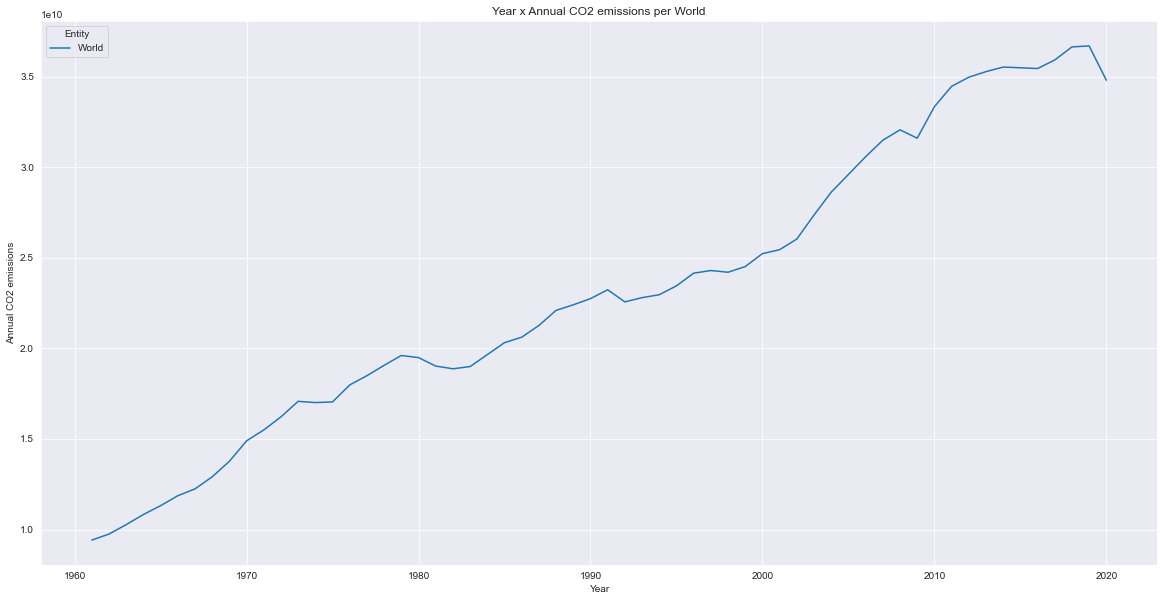

In [29]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per World")

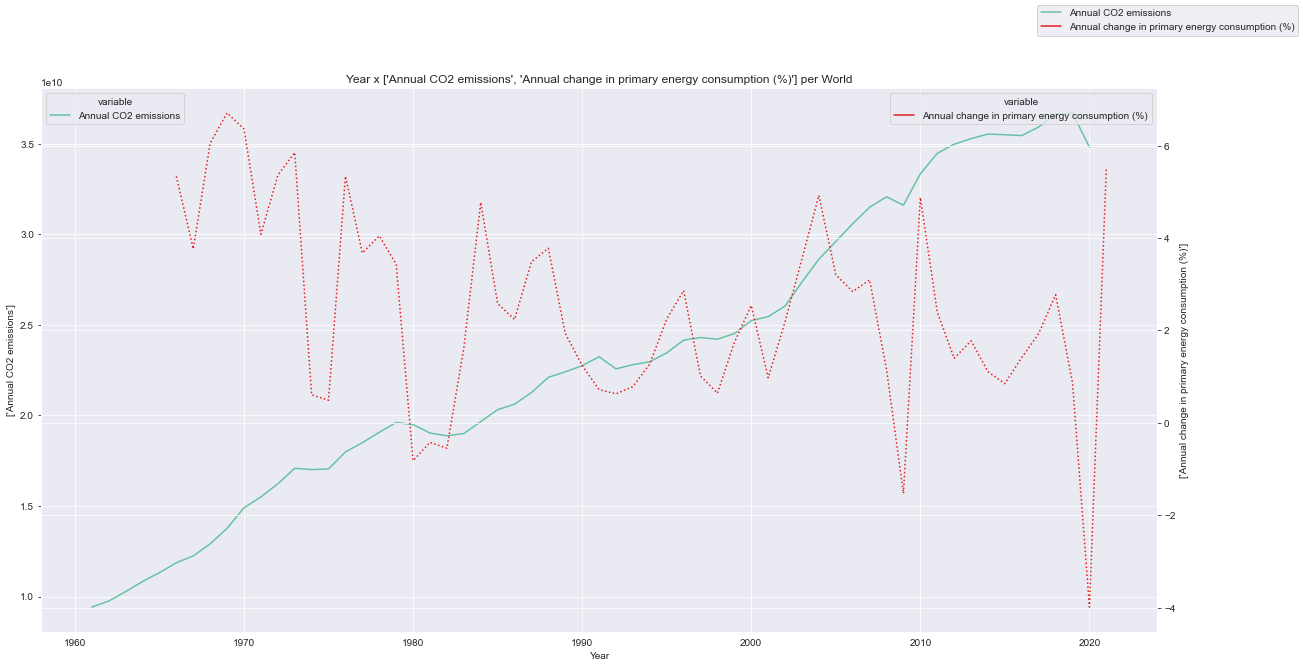

In [30]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per World")

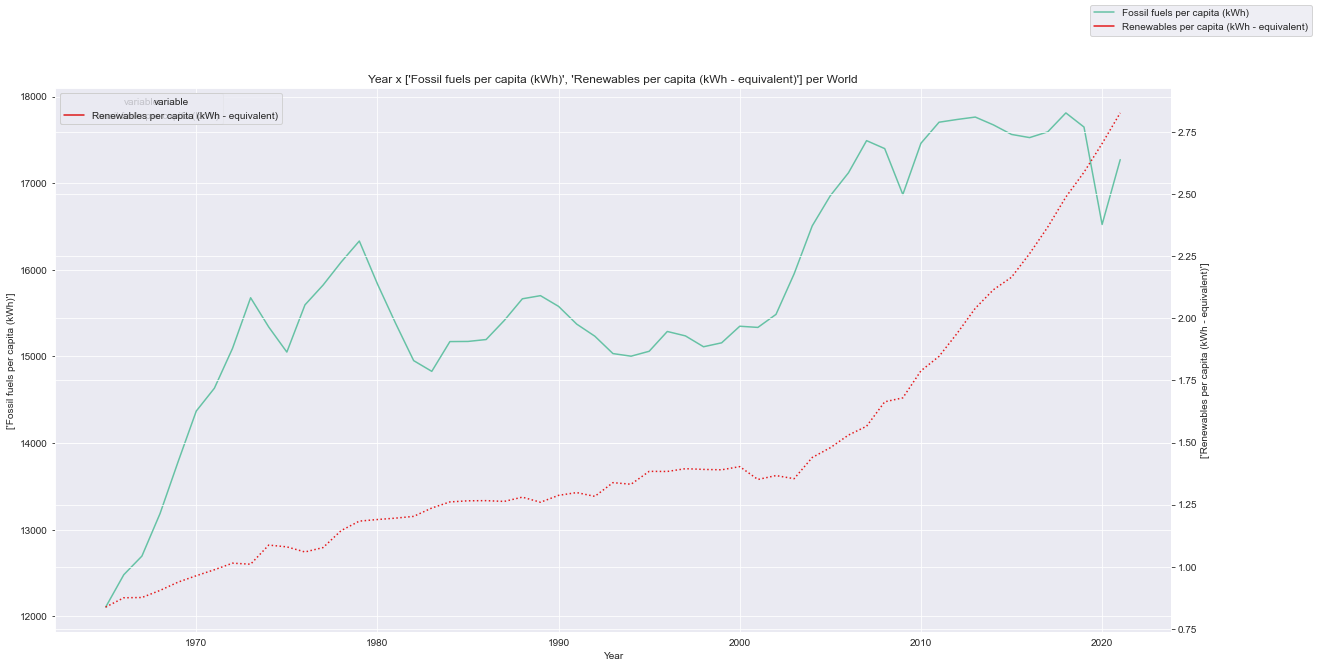

In [31]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)', 'Fossil fuels per capita (kWh)'] per World")

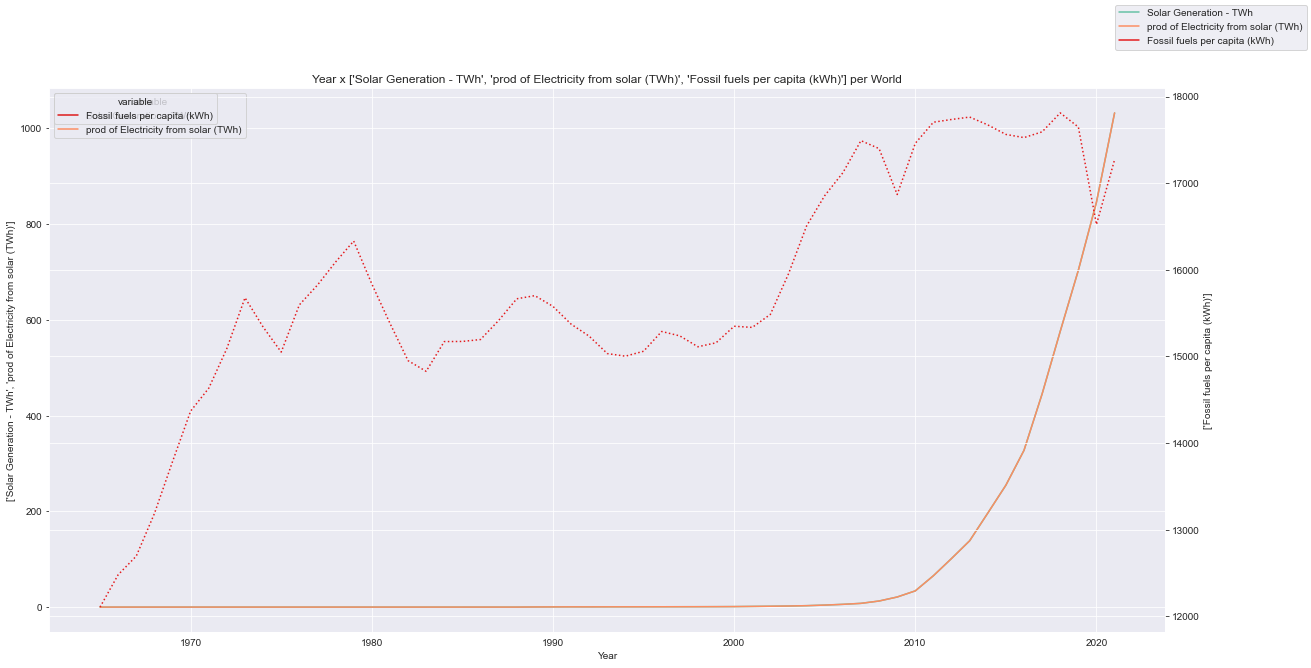

In [32]:
y1 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']
y2 = ['Fossil fuels per capita (kWh)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [33]:
corr = df[corr_columns].corr()

Text(0.5, 1.0, 'Correlation of Key Metrics across Years in Entity [World]')

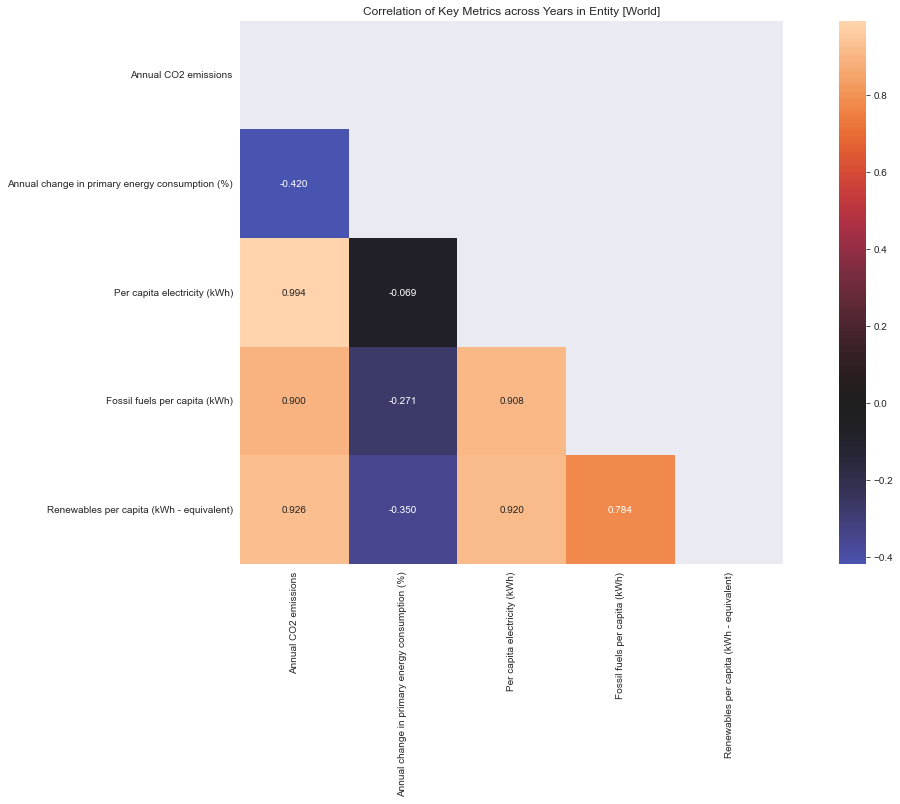

In [34]:
masked_heatmap()
plt.title(f"Correlation of Key Metrics across Years in Entity [{category_filter}]")

### Income Level

In [35]:
df_original['Entity_Category'].value_counts()

Country             13243
Bp?                  1549
Eia?                 1040
Exlusive Regions      361
Continent             344
Income Level          244
Ember?                110
World                  61
Other                  61
Name: Entity_Category, dtype: int64

In [36]:
category_filter = "Income Level"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [37]:
df.head()

,Entity_Category,Entity,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
10115,Income Level,High-Income Countries,1961,6.297137e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10116,Income Level,High-Income Countries,1962,6.600679e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10117,Income Level,High-Income Countries,1963,6.952760e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10118,Income Level,High-Income Countries,1964,7.300569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10119,Income Level,High-Income Countries,1965,7.545914e+09,NaN,NaN,12326.0,12326.0,12326.0,4673.567383,10125.585938,13575.577148,28374.730469,NaN,8608.763672,NaN,34896.5,92.775543,NaN,NaN,NaN,17.885233,0.0,0.0,705.694092,0.0,705.694092,0.0,17.885233,NaN,2.634769,NaN


In [38]:
df.describe()

,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
count,244.000000,2.400000e+02,168.000000,207.000000,225.000000,225.000000,225.000000,171.000000,171.000000,171.000000,171.000000,123.000000,225.000000,203.000000,171.000000,171.000000,0.0,0.0,0.0,171.000000,171.000000,171.000000,171.000000,193.000000,193.000000,193.000000,193.000000,133.000000,171.000000,133.000000
mean,1991.000000,5.590303e+09,3.469417,3.163113,5164.995556,5164.995556,5164.995556,6946.793735,9367.830076,12395.928611,28710.551440,10762.281830,9207.432737,5713.456888,21412.252189,89.395315,NaN,NaN,NaN,67.225539,27.665864,75.437945,735.307679,66.863827,657.537580,24.538201,59.645270,3378.353503,1.867653,25.145435
std,17.643008,5.180332e+09,8.093721,7.412832,3368.613917,3368.613917,3368.613917,5120.665625,6683.579268,9520.041176,18981.398904,6985.285411,6968.022350,4964.952596,18808.978401,3.961506,NaN,NaN,NaN,94.736834,84.044199,184.244260,561.301775,175.016311,571.177889,79.564569,91.627820,3652.276890,1.782040,14.179119
min,1961.000000,4.232722e+07,-12.149286,-11.670905,1862.000000,1862.000000,1862.000000,38.420399,449.159424,531.817078,1022.205017,835.380554,12.194840,0.000000,919.215820,79.292038,NaN,NaN,NaN,0.000000,0.000000,0.000000,30.508142,0.000000,0.160000,0.000000,0.000000,0.457940,0.081123,13.453400
25%,1976.000000,5.321648e+08,1.098689,0.720334,2698.000000,2698.000000,2698.000000,2938.063599,4125.774536,4248.859619,11389.486816,6415.516846,2613.189209,264.276413,4847.473877,86.153561,NaN,NaN,NaN,5.465880,0.000000,0.000000,196.864944,0.000000,149.345871,0.000000,2.112300,456.813019,0.283997,15.812326
50%,1991.000000,3.980009e+09,2.939725,2.898777,5718.000000,5718.000000,5718.000000,5789.330078,9759.784180,8558.723633,24806.148438,10877.906250,7515.976562,6118.325684,12450.393555,90.571709,NaN,NaN,NaN,24.964964,0.010000,0.388838,705.694092,0.213121,491.293976,0.010603,19.684008,1400.210938,1.061095,20.258909
75%,2006.000000,1.069604e+10,4.996863,4.931581,9132.000000,9132.000000,9132.000000,9679.897949,12099.454102,22452.874023,46922.021484,11728.530762,14975.213867,8537.432617,44505.830078,92.263870,NaN,NaN,NaN,82.411488,1.114080,30.843562,1203.226562,18.056793,1164.543945,0.837612,74.533669,7380.317871,3.540976,25.670504
max,2021.000000,1.605437e+10,98.222099,95.384125,12539.000000,12539.000000,12539.000000,19902.830078,27708.554688,29155.564453,58635.714844,29293.859375,25383.656250,19068.613281,52244.367188,95.671173,NaN,NaN,NaN,385.799042,513.403381,929.272583,2230.803467,929.272583,2230.803467,513.403381,385.799042,9985.499023,6.883817,65.129036


#### Lineplots - Yearly

In [39]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Income Level')

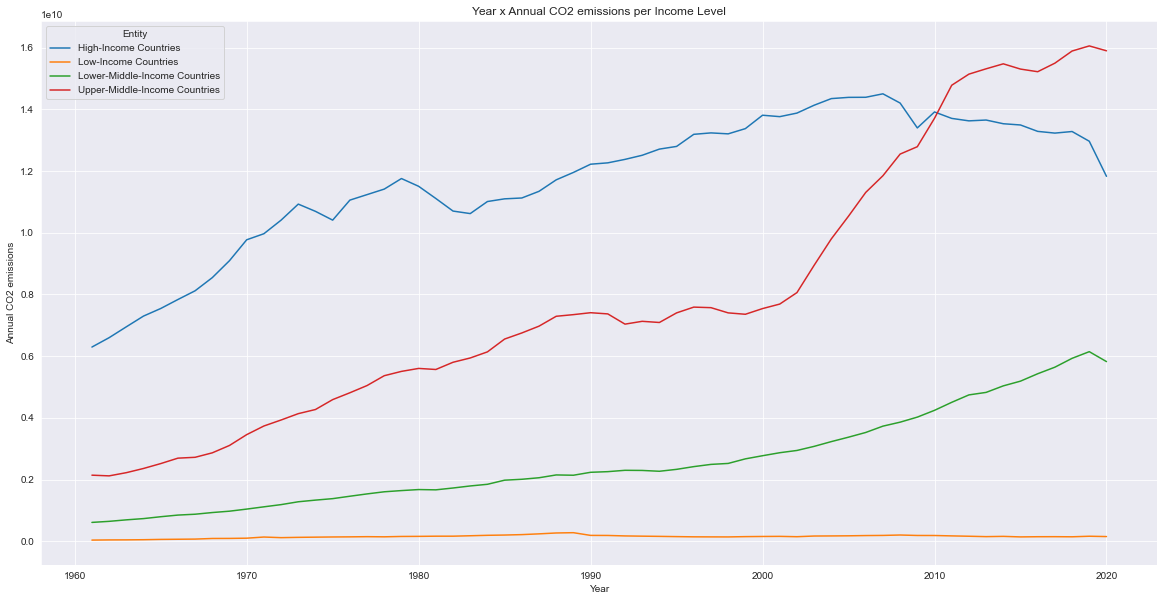

In [40]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Income Level")

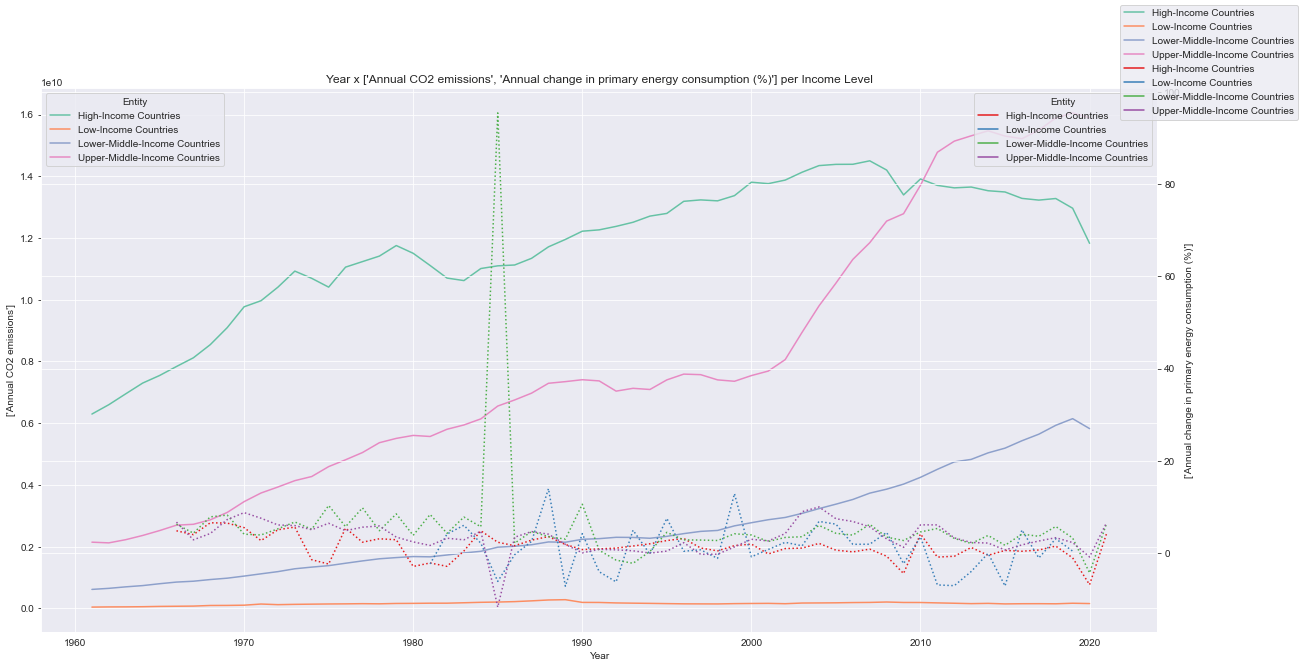

In [41]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Income Level")

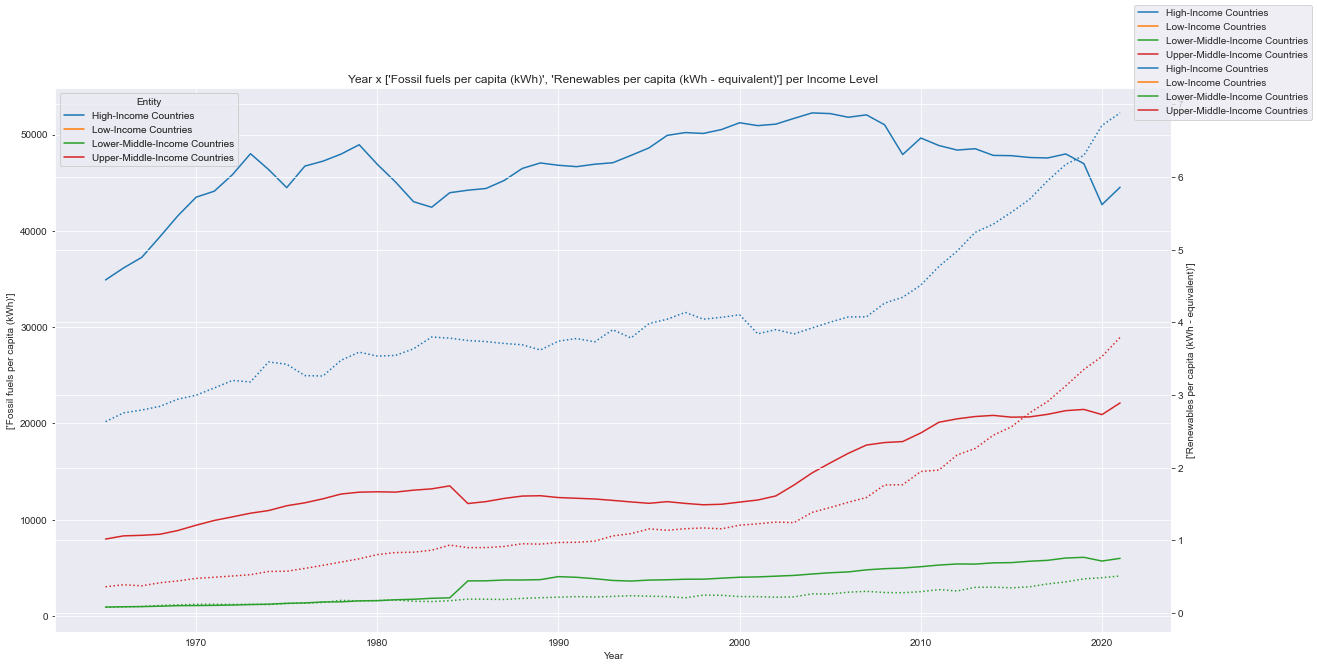

In [42]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Income Level")

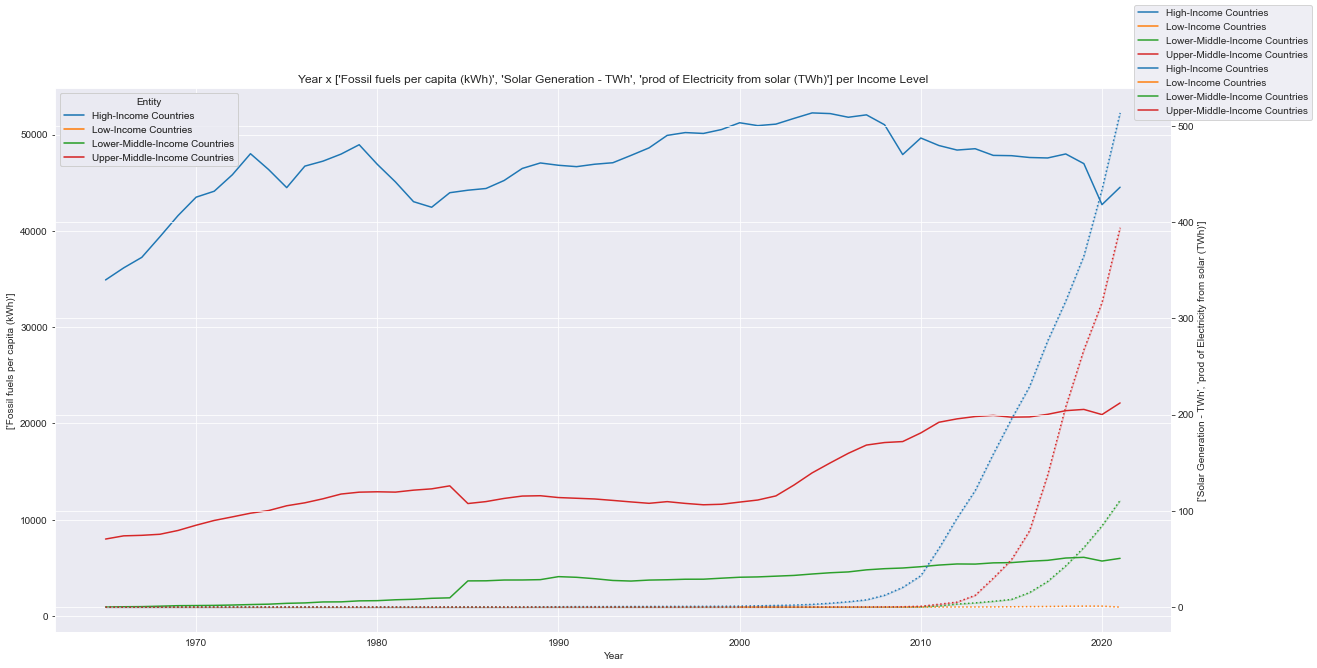

In [43]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [44]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Income Level]')

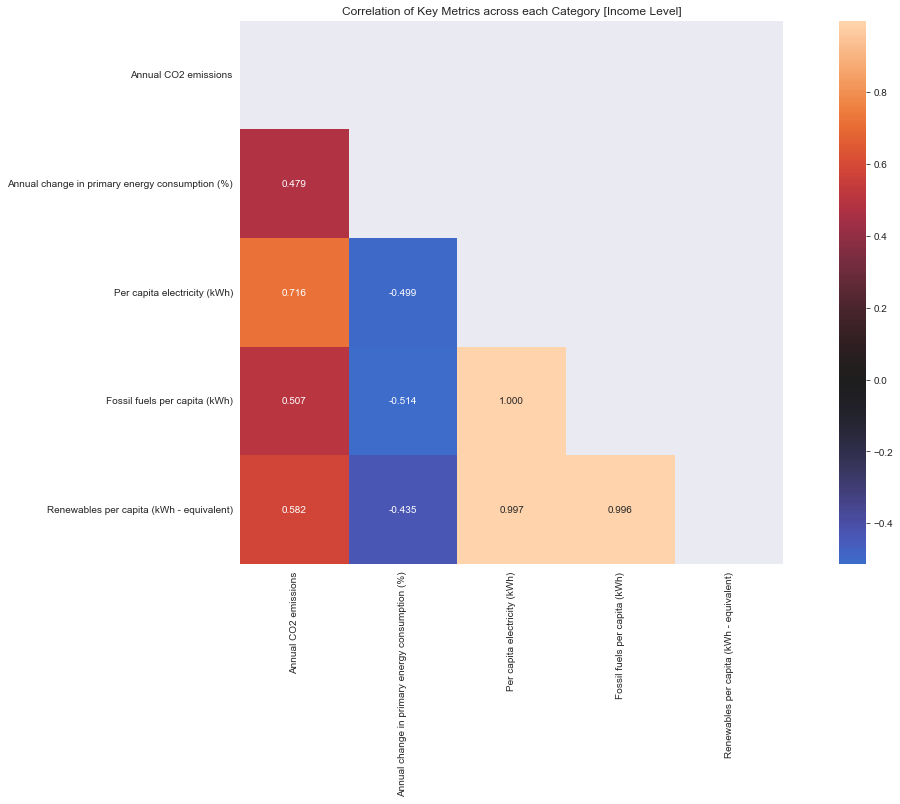

In [45]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

### Continent

In [46]:
category_filter = "Continent"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [47]:
df.head()

,Entity_Category,Entity,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
149,Continent,Africa,1961,162078599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Continent,Africa,1962,166426479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Continent,Africa,1963,176448437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Continent,Africa,1964,193763891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Continent,Africa,1965,213784592.0,NaN,NaN,12291.0,12291.0,12291.0,9.543755,323.496124,341.262756,674.302673,NaN,1235.100952,NaN,2106.226318,94.25251,NaN,NaN,NaN,NaN,NaN,0.0,13.905636,0.0,13.905636,NaN,NaN,NaN,0.128437,NaN


In [48]:
df.describe()

,Year,Annual CO2 emissions,Fossil fuels (% growth),Annual change in primary energy consumption (%),Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Gas Consumption - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Fossil fuels (TWh),Coal Production - TWh,Oil Production - TWh,Gas Production - TWh,Fossil fuels per capita (kWh),Fossil fuels (% equivalent primary energy),"Gas (TWh, direct energy)","Oil (TWh, direct energy)","Coal (TWh, direct energy)",Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,prod of Electricity from wind (TWh),prod of Electricity from hydro (TWh),prod of Electricity from solar (TWh),prod of Other renewables including bioenergy (TWh),Per capita electricity (kWh),Renewables per capita (kWh - equivalent),Renewables (% electricity)
count,344.000000,3.210000e+02,280.000000,319.000000,324.000000,324.000000,324.000000,285.000000,285.000000,285.000000,285.000000,205.000000,285.000000,260.000000,285.000000,285.000000,0.0,0.0,0.0,279.000000,267.000000,273.000000,285.000000,273.000000,285.000000,267.000000,279.000000,185.000000,285.000000,185.000000
mean,1992.020349,4.144626e+09,2.599684,2.458146,2647.956790,2647.956790,2647.956790,4254.398770,5625.187544,7709.957319,17589.543097,6143.792222,7655.494867,4514.057994,22282.951734,85.437044,NaN,NaN,NaN,40.899666,17.426988,46.780487,476.824946,46.780487,476.824946,17.426988,40.899666,4025.658106,2.453497,29.350527
std,17.269165,4.241829e+09,3.749343,6.977064,2509.215237,2509.215237,2509.215237,4016.079317,7350.825759,6004.410714,16266.258445,7268.643233,5029.618254,3792.127104,20069.423194,9.023672,NaN,NaN,NaN,56.691913,63.247649,115.947183,358.387674,115.947183,358.387674,63.247649,56.691913,3378.704635,1.936062,22.870495
min,1961.000000,3.664000e+03,-10.257816,-95.005081,0.000000,0.000000,0.000000,9.543755,66.624680,341.262756,674.302673,78.990776,1235.100952,30.172163,2106.051270,60.153706,NaN,NaN,NaN,0.000000,0.000000,0.000000,13.905636,0.000000,13.905636,0.000000,0.000000,466.092743,0.128437,12.360984
25%,1978.000000,6.676582e+08,0.518677,0.177598,248.750000,248.750000,248.750000,521.825256,507.246979,1734.740723,3225.641113,1264.931396,3880.907471,872.655258,5029.313477,81.722176,NaN,NaN,NaN,3.204722,0.000000,0.000000,149.045563,0.000000,149.045563,0.000000,3.204722,1042.379517,0.321926,16.439018
50%,1992.500000,3.771441e+09,2.526265,2.534151,1519.500000,1519.500000,1519.500000,2777.180664,4050.202148,8636.170898,19134.830078,4498.670898,7299.555176,3746.651489,10257.729492,89.619415,NaN,NaN,NaN,16.227060,0.009186,0.190800,506.040619,0.190800,506.040619,0.009186,16.227060,2628.798828,2.427273,17.990870
75%,2007.000000,6.421483e+09,5.072358,4.852182,4824.250000,4824.250000,4824.250000,7569.074219,6721.992188,12275.271484,26455.843750,7067.227051,8700.134766,7806.816772,41212.937500,92.074448,NaN,NaN,NaN,64.038774,0.927751,14.223822,670.596619,14.223822,670.596619,0.927751,64.038774,6556.126465,4.404799,25.492777
max,2021.000000,2.060859e+10,16.714907,36.785065,12382.000000,12382.000000,12382.000000,16249.497070,36037.972656,24867.578125,76744.687500,33334.093750,23247.154297,14309.506836,63749.539062,94.883224,NaN,NaN,NaN,336.357239,579.658936,785.607178,1980.761597,785.607178,1980.761597,579.658935,336.357239,10285.139650,6.185515,82.105980


#### Lineplots - Yearly

In [49]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Continent')

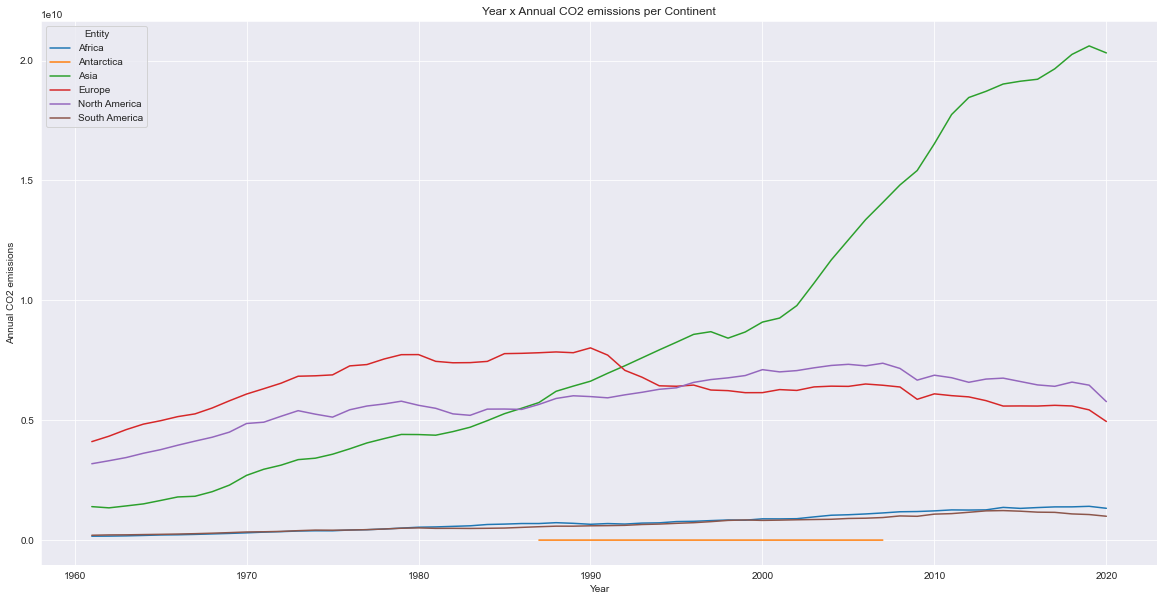

In [50]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual change in primary energy consumption (%)'] per Continent")

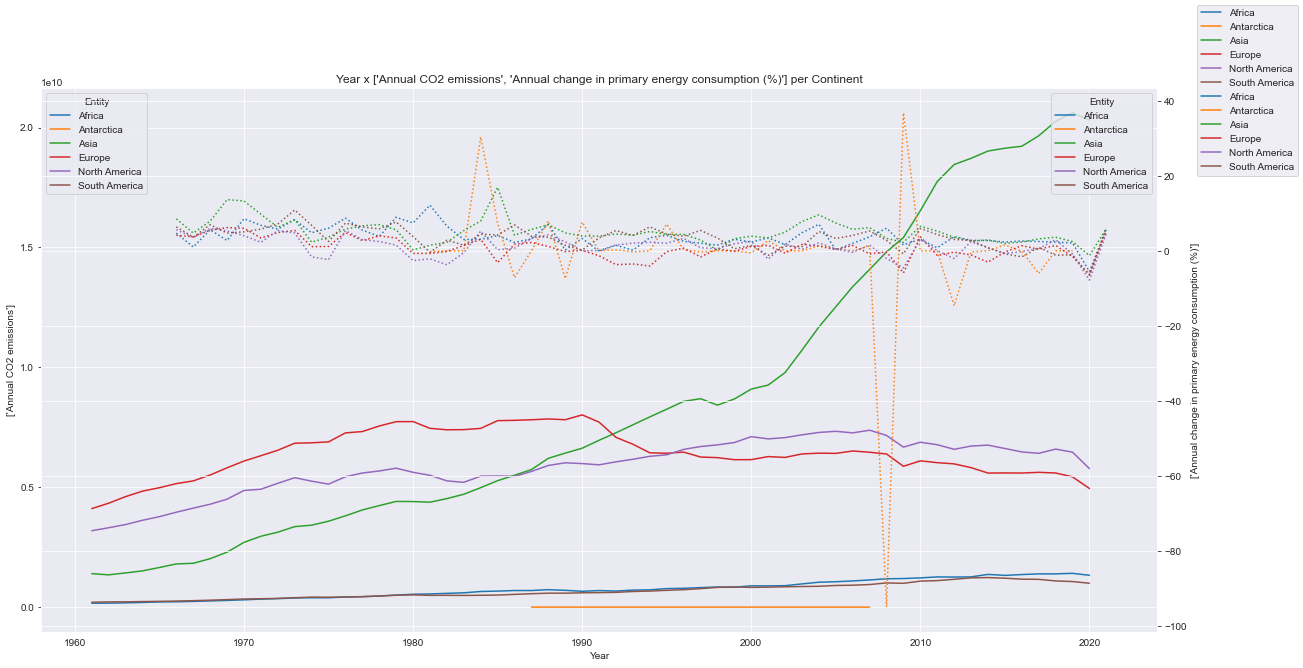

In [51]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] per Continent")

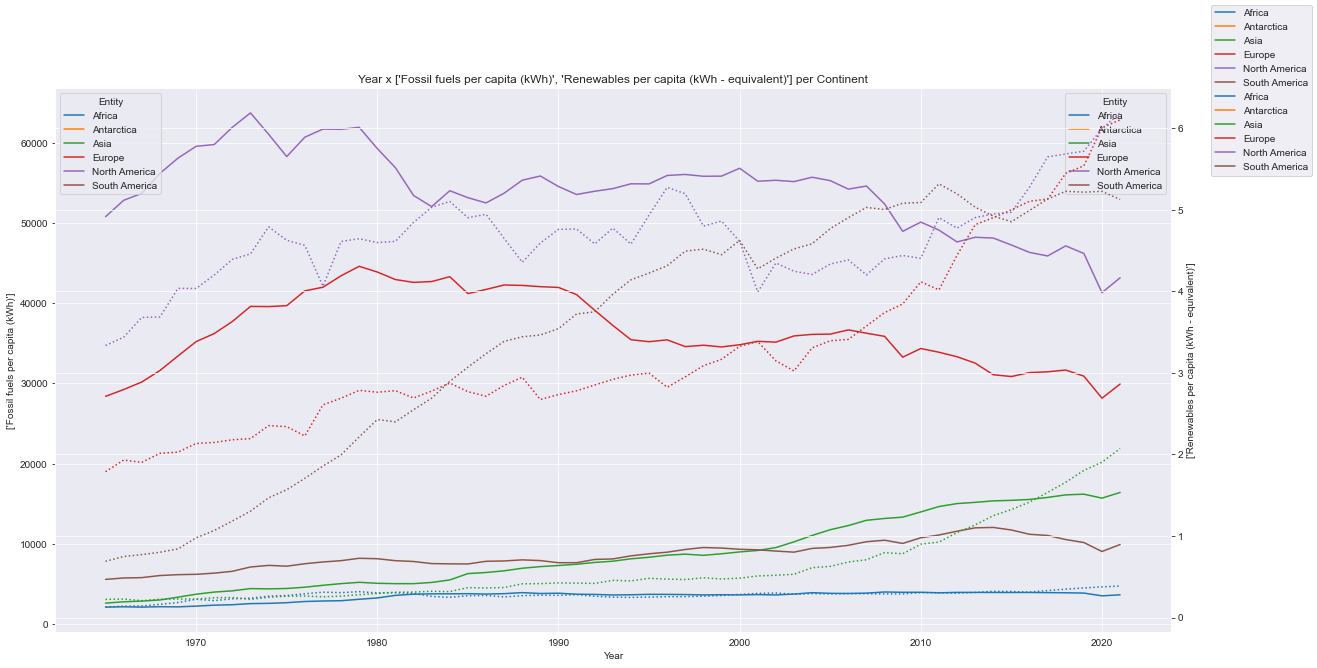

In [52]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Continent")

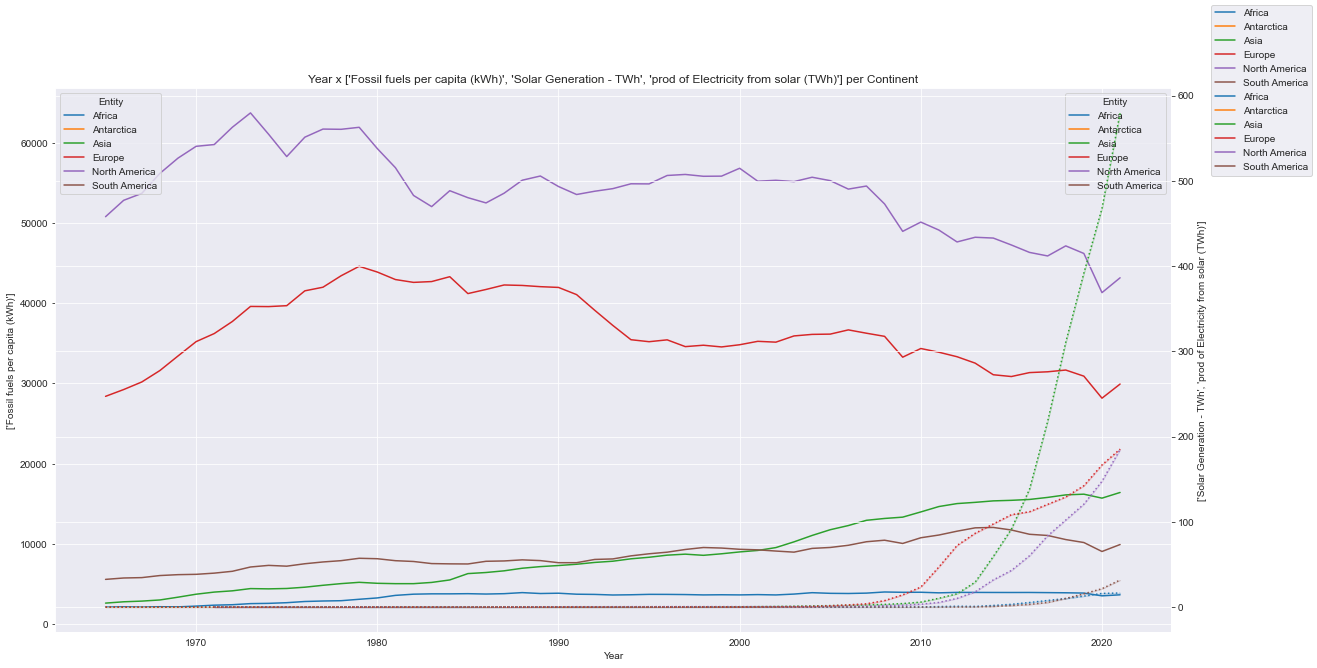

In [53]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [54]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Continent]')

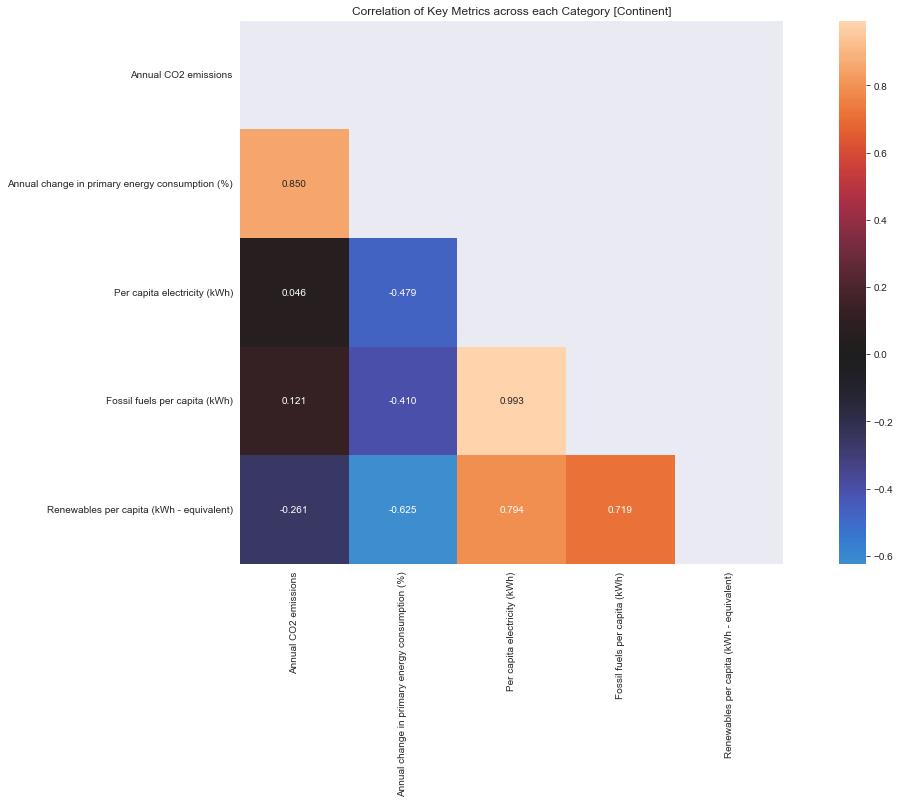

In [55]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")